In [3]:
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
from seaborn import load_dataset
import matplotlib.pyplot as plt
import numpy as np
import shap
import matplotlib as mpl

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedKFold

In [7]:
iris = load_iris()

In [10]:
iris_df = pd.DataFrame(iris.data,columns=iris['feature_names'])

In [11]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [129]:
X = iris_df
# y= iris_df['species'].apply(lambda x: 1 if x == 'setosa' else 0)
y= iris.target

In [130]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=12)

In [131]:
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
10,5.4,3.7,1.5,0.2
46,5.1,3.8,1.6,0.2
36,5.5,3.5,1.3,0.2
124,6.7,3.3,5.7,2.1
7,5.0,3.4,1.5,0.2
...,...,...,...,...
76,6.8,2.8,4.8,1.4
3,4.6,3.1,1.5,0.2
130,7.4,2.8,6.1,1.9
134,6.1,2.6,5.6,1.4


In [132]:
lr = LogisticRegression(random_state=12)

In [133]:
lr.fit(X_train,y_train)

LogisticRegression(random_state=12)

In [134]:
train_score = lr.score(X_train,y_train)
train_score

0.9714285714285714

In [135]:
test_score = lr.score(X_test,y_test)
test_score

0.9777777777777777

In [136]:
# KFold 객체 생성 (여기서는 5-폴드 교차 검증을 사용합니다)
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=12)

cv_scores = cross_val_score(lr,X,y,cv=kf,scoring='accuracy')

print(cv_scores)
print(cv_scores.mean())

[1.         1.         0.96666667 0.93333333 0.96666667]
0.9733333333333334


In [137]:
shap.initjs()

In [138]:
explainer = shap.LinearExplainer(lr,X)

In [139]:
shap_train = explainer.shap_values(X_train)

In [140]:
shap_test = explainer.shap_values(X_test)

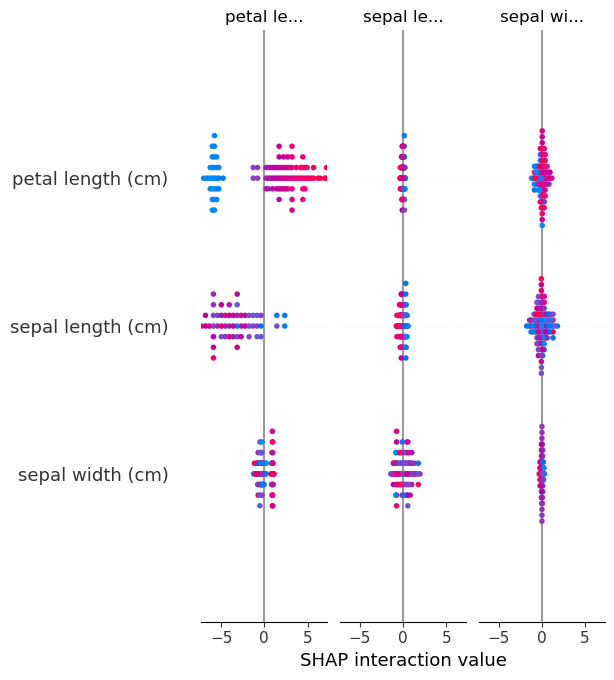

In [141]:
shap.summary_plot(
    shap_train,
    X_train,
    plot_type='bar',
)

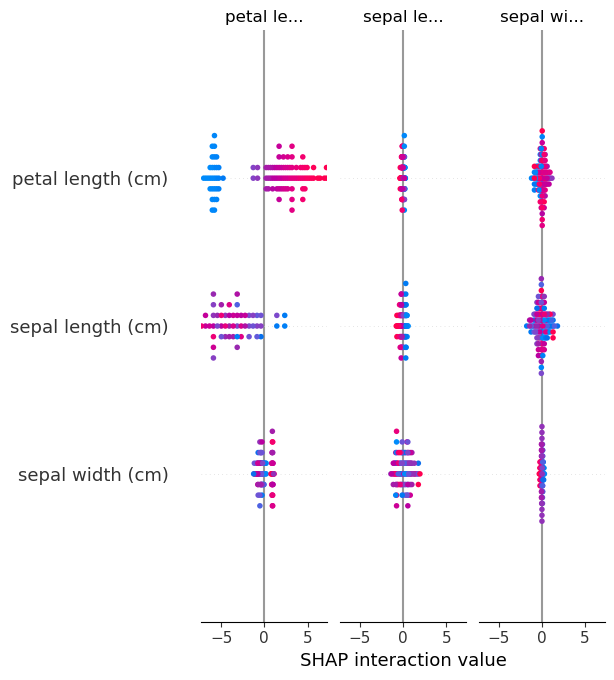

In [142]:
shap.summary_plot(
    shap_train,
    X_train,
)